# MovieLens 1M Dataset - Exploratory Data Analysis

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.dataframes import users, movies, ratings

---
## 1. Dataset Overview

In [26]:
print(f"\n{'Metric':<30} {'Value':>15}")
print("-" * 45)
print(f"{'Total Users':<30} {len(users):>15,}")
print(f"{'Total Movies':<30} {len(movies):>15,}")
print(f"{'Total Ratings':<30} {len(ratings):>15,}")
print(f"{'Rating Scale':<30} {'1-5':>15}")
print(f"{'Date Range':<30} {ratings['Timestamp'].min().strftime('%Y-%m-%d')} to {ratings['Timestamp'].max().strftime('%Y-%m-%d')}")


Metric                                   Value
---------------------------------------------
Total Users                              6,040
Total Movies                             3,883
Total Ratings                        1,000,209
Rating Scale                               1-5
Date Range                     2000-04-25 to 2003-02-28


### Users

In [27]:
display(users.head(10))
print(f"Shape: {users.shape}")

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


Shape: (6040, 5)


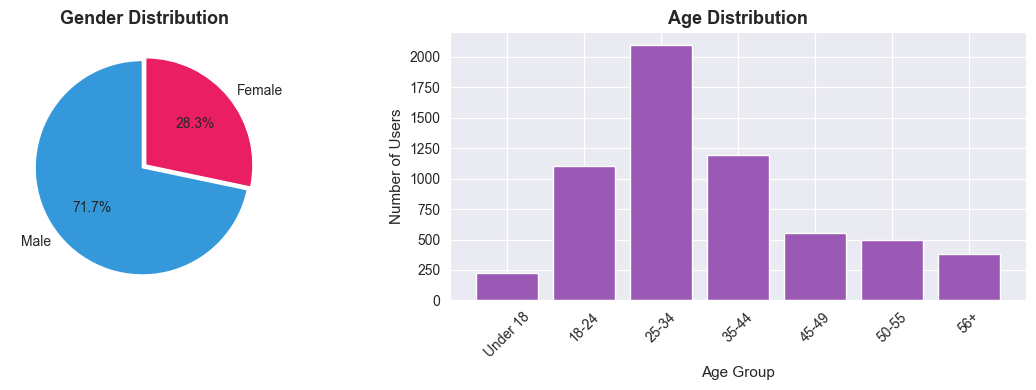

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gender pie chart
ax1 = axes[0]
gender_counts = users['Gender'].value_counts()
colors = ['#3498db', '#e91e63']
ax1.pie(gender_counts.values, labels=['Male', 'Female'], colors=colors, 
        autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02))
ax1.set_title('Gender Distribution', fontsize=13, fontweight='bold')

# Age histogram
ax2 = axes[1]
age_labels = {1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44', 
              45: '45-49', 50: '50-55', 56: '56+'}
age_counts = users['Age'].value_counts().sort_index()
bars = ax2.bar([age_labels[a] for a in age_counts.index], age_counts.values, 
               color='#9b59b6', edgecolor='white')
ax2.set_xlabel('Age Group', fontsize=11)
ax2.set_ylabel('Number of Users', fontsize=11)
ax2.set_title('Age Distribution', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./plots/user_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

### Movies

In [29]:
display(movies.head(10))
print(f"Shape: {movies.shape}")

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Shape: (3883, 3)


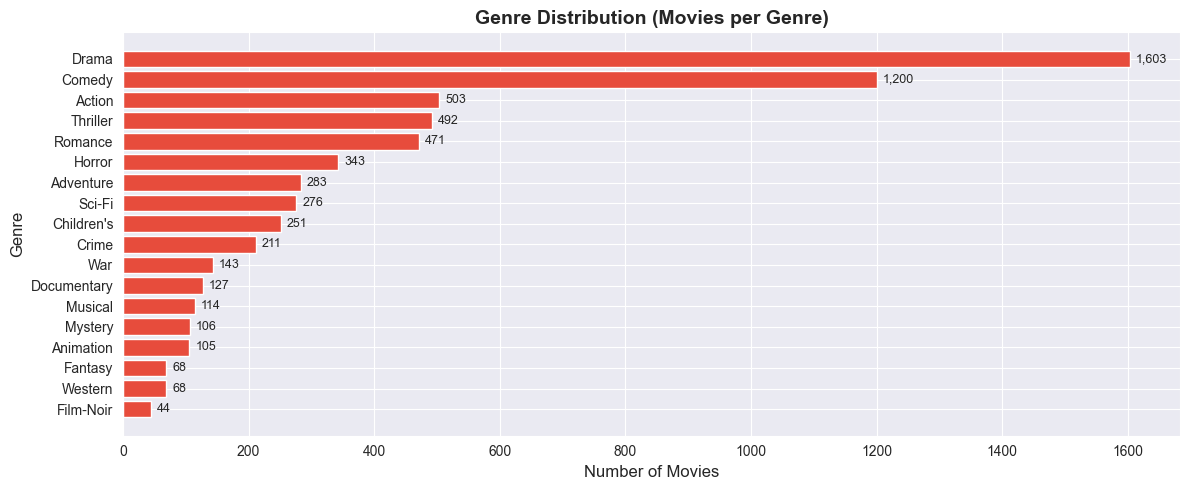

In [30]:
all_genres = movies['Genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.barh(genre_counts.index[::-1], genre_counts.values[::-1], color='#e74c3c', edgecolor='white')
ax.set_xlabel('Number of Movies', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Genre Distribution (Movies per Genre)', fontsize=14, fontweight='bold')

# Add count labels
for bar, count in zip(bars, genre_counts.values[::-1]):
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('./plots/genre_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### Ratings

In [31]:
display(ratings.head(10))
print(f"\nShape: {ratings.shape}")

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
5,1,1197,3,2000-12-31 22:37:48
6,1,1287,5,2000-12-31 22:33:59
7,1,2804,5,2000-12-31 22:11:59
8,1,594,4,2000-12-31 22:37:48
9,1,919,4,2000-12-31 22:22:48



Shape: (1000209, 4)


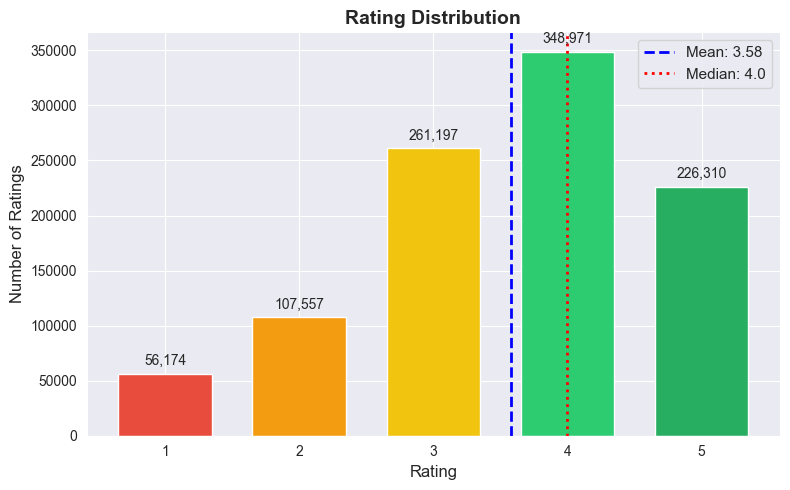

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
rating_counts = ratings['Rating'].value_counts().sort_index()
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60']
bars = ax.bar(rating_counts.index, rating_counts.values, color=colors, edgecolor='white', width=0.7)

mean_rating = ratings['Rating'].mean()
median_rating = ratings['Rating'].median()

ax.axvline(mean_rating, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')
ax.axvline(median_rating, color='red', linestyle=':', linewidth=2, label=f'Median: {median_rating:.1f}')

ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
ax.set_title('Rating Distribution', fontsize=14, fontweight='bold')
ax.set_xticks([1, 2, 3, 4, 5])
ax.legend(fontsize=11)

# Add count labels on bars
for bar, count in zip(bars, rating_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000, 
            f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('./plots/rating_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 2. Interaction Sparsity Analysis

The user-item interaction matrix is typically very sparse. Let's quantify this sparsity

In [33]:
n_users = users['UserID'].nunique()
n_movies = movies['MovieID'].nunique()
n_ratings = len(ratings)

total_possible = n_users * n_movies

density = n_ratings / total_possible
sparsity = 1 - density

print(f"{'Unique Users':<35} {n_users:>20,}")
print(f"{'Unique Movies':<35} {n_movies:>20,}")
print(f"{'Total Possible Interactions':<35} {total_possible:>20,}")
print(f"{'Observed Interactions':<35} {n_ratings:>20,}")
print(f"{'Matrix Density':<35} {density:>19.4%}")
print(f"{'Matrix Sparsity':<35} {sparsity:>19.4%}")
print(f"{'Avg Ratings per User':<35} {n_ratings/n_users:>20.1f}")
print(f"{'Avg Ratings per Movie':<35} {n_ratings/n_movies:>20.1f}")

Unique Users                                       6,040
Unique Movies                                      3,883
Total Possible Interactions                   23,453,320
Observed Interactions                          1,000,209
Matrix Density                                  4.2647%
Matrix Sparsity                                95.7353%
Avg Ratings per User                               165.6
Avg Ratings per Movie                              257.6


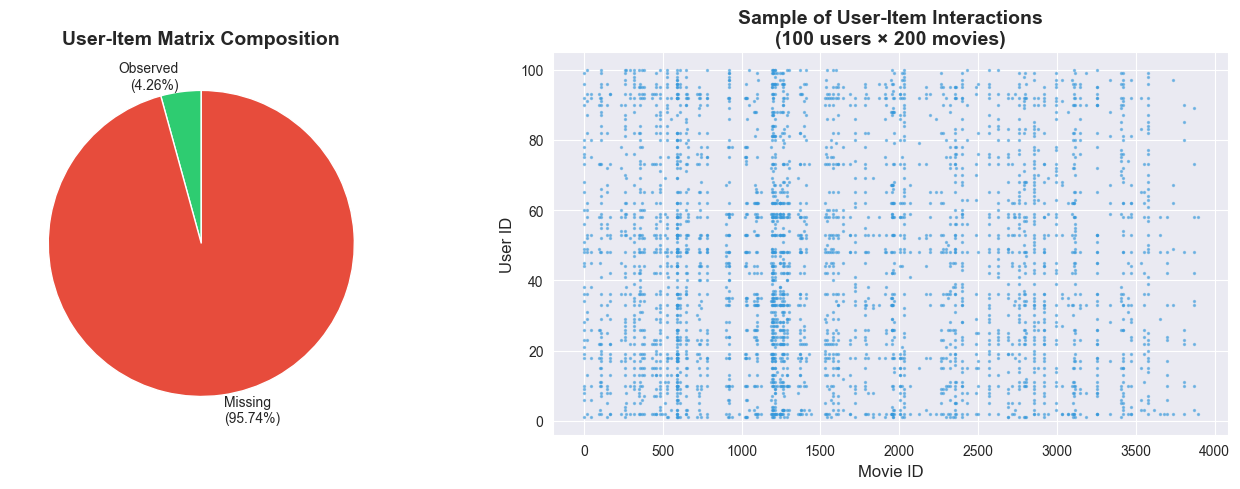

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
sizes = [density * 100, sparsity * 100]
labels = [f'Observed\n({density:.2%})', f'Missing\n({sparsity:.2%})']
colors = ['#2ecc71', '#e74c3c']
ax1.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90)
ax1.set_title('User-Item Matrix Composition', fontsize=14, fontweight='bold')

ax2 = axes[1]
sample_users = ratings['UserID'].drop_duplicates().head(100).values
sample_movies = ratings['MovieID'].drop_duplicates().head(200).values
sample_ratings = ratings[
    (ratings['UserID'].isin(sample_users)) & 
    (ratings['MovieID'].isin(sample_movies))
]

ax2.scatter(sample_ratings['MovieID'], sample_ratings['UserID'], 
            alpha=0.5, s=2, c='#3498db')
ax2.set_xlabel('Movie ID', fontsize=12)
ax2.set_ylabel('User ID', fontsize=12)
ax2.set_title('Sample of User-Item Interactions\n(100 users × 200 movies)', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./plots/sparsity_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

### Ratings per User

In [35]:
user_activity = ratings.groupby('UserID').size().reset_index(name='n_ratings')
user_activity = user_activity.merge(users, on='UserID')

print(f"{'Mean':<30} {user_activity['n_ratings'].mean():>20.1f}")
print(f"{'Median':<30} {user_activity['n_ratings'].median():>20.1f}")
print(f"{'Std Dev':<30} {user_activity['n_ratings'].std():>20.1f}")
print(f"{'Min':<30} {user_activity['n_ratings'].min():>20}")
print(f"{'Max':<30} {user_activity['n_ratings'].max():>20}")
print(f"{'25th Percentile':<30} {user_activity['n_ratings'].quantile(0.25):>20.0f}")
print(f"{'75th Percentile':<30} {user_activity['n_ratings'].quantile(0.75):>20.0f}")
print(f"{'90th Percentile':<30} {user_activity['n_ratings'].quantile(0.90):>20.0f}")

Mean                                          165.6
Median                                         96.0
Std Dev                                       192.7
Min                                              20
Max                                            2314
25th Percentile                                  44
75th Percentile                                 208
90th Percentile                                 400


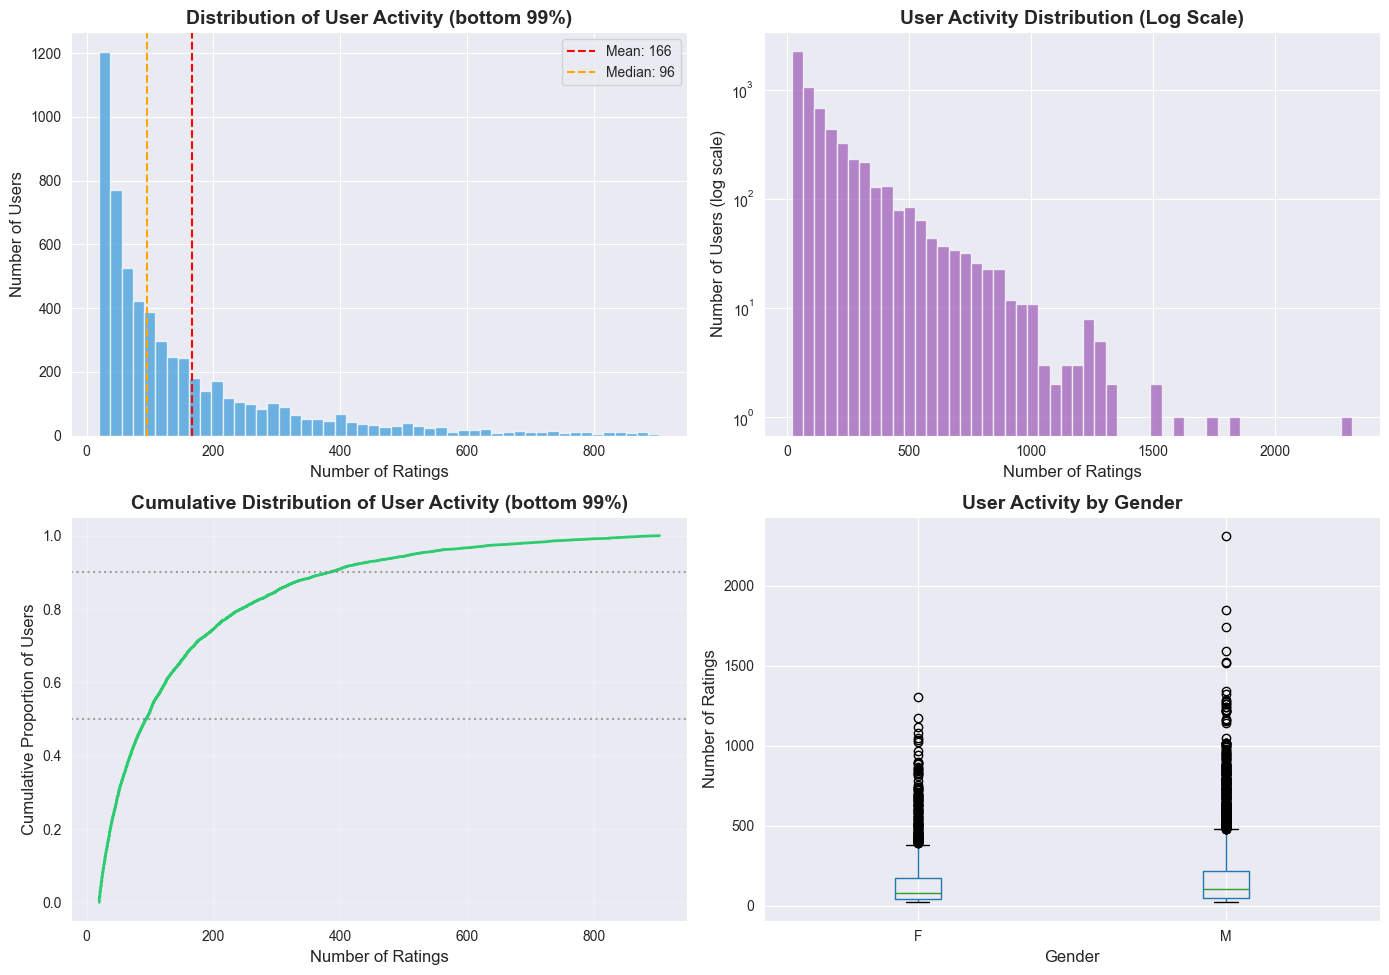

In [36]:
user_activity_bottom_99 = user_activity[user_activity['n_ratings'] <= user_activity['n_ratings'].quantile(0.99)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.hist(user_activity_bottom_99['n_ratings'], bins=50, edgecolor='white', alpha=0.7, color='#3498db')
ax1.axvline(user_activity['n_ratings'].mean(), color='red', linestyle='--', 
            label=f'Mean: {user_activity["n_ratings"].mean():.0f}')
ax1.axvline(user_activity['n_ratings'].median(), color='orange', linestyle='--',
            label=f'Median: {user_activity["n_ratings"].median():.0f}')
ax1.set_xlabel('Number of Ratings', fontsize=12)
ax1.set_ylabel('Number of Users', fontsize=12)
ax1.set_title('Distribution of User Activity (bottom 99%)', fontsize=14, fontweight='bold')
ax1.legend()

ax2 = axes[0, 1]
ax2.hist(user_activity['n_ratings'], bins=50, edgecolor='white', alpha=0.7, color='#9b59b6')
ax2.set_yscale('log')
ax2.set_xlabel('Number of Ratings', fontsize=12)
ax2.set_ylabel('Number of Users (log scale)', fontsize=12)
ax2.set_title('User Activity Distribution (Log Scale)', fontsize=14, fontweight='bold')

# CDF of user activity
ax3 = axes[1, 0]
sorted_activity = np.sort(user_activity_bottom_99['n_ratings'])
cdf = np.arange(1, len(sorted_activity) + 1) / len(sorted_activity)
ax3.plot(sorted_activity, cdf, linewidth=2, color='#2ecc71')
ax3.axhline(0.5, color='gray', linestyle=':', alpha=0.7)
ax3.axhline(0.9, color='gray', linestyle=':', alpha=0.7)
ax3.set_xlabel('Number of Ratings', fontsize=12)
ax3.set_ylabel('Cumulative Proportion of Users', fontsize=12)
ax3.set_title('Cumulative Distribution of User Activity (bottom 99%)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Box plot by gender
ax4 = axes[1, 1]
user_activity.boxplot(column='n_ratings', by='Gender', ax=ax4)
ax4.set_xlabel('Gender', fontsize=12)
ax4.set_ylabel('Number of Ratings', fontsize=12)
ax4.set_title('User Activity by Gender', fontsize=14, fontweight='bold')
plt.suptitle('')

plt.tight_layout()
plt.savefig('./plots/user_activity.png', bbox_inches='tight')
plt.show()

### User Activity Segments

Segments represent number of ratings per user in group

In [37]:
bins = [0, 20, 50, 100, 200, 500, float('inf')]
labels = ['Very Low (1-20)', 'Low (21-50)', 'Medium (51-100)', 
          'High (101-200)', 'Very High (201-500)', 'Power Users (500+)']
user_activity['segment'] = pd.cut(user_activity['n_ratings'], bins=bins, labels=labels)

segment_stats = user_activity.groupby('segment', observed=True).agg({
    'UserID': 'count',
    'n_ratings': ['mean', 'sum']
}).round(1)
segment_stats.columns = ['Users', 'Avg Ratings', 'Total Ratings']
segment_stats['% of Users'] = (segment_stats['Users'] / len(user_activity) * 100).round(1)
segment_stats['% of Ratings'] = (segment_stats['Total Ratings'] / n_ratings * 100).round(1)

display(segment_stats)

,Users,Avg Ratings,Total Ratings,% of Users,% of Ratings
segment,,,,,
Very Low (1-20),86,20.0,1720,1.4,0.2
Low (21-50),1707,33.7,57518,28.3,5.8
Medium (51-100),1338,72.7,97269,22.2,9.7
High (101-200),1331,141.9,188921,22.0,18.9
Very High (201-500),1182,309.6,365972,19.6,36.6
Power Users (500+),396,729.3,288809,6.6,28.9


---
## 4. Item (Movie) Popularity Distribution

Let's analyze how ratings are distributed across movies.

In [38]:
# Calculate ratings per movie
movie_popularity = ratings.groupby('MovieID').agg({
    'Rating': ['count', 'mean', 'std']
}).reset_index()
movie_popularity.columns = ['MovieID', 'n_ratings', 'avg_rating', 'std_rating']
movie_popularity = movie_popularity.merge(movies, on='MovieID')

print("MOVIE POPULARITY STATISTICS")
print(f"\n{'Statistic':<30} {'Ratings per Movie':>20}")
print("-" * 50)
print(f"{'Mean':<30} {movie_popularity['n_ratings'].mean():>20.1f}")
print(f"{'Median':<30} {movie_popularity['n_ratings'].median():>20.1f}")
print(f"{'Std Dev':<30} {movie_popularity['n_ratings'].std():>20.1f}")
print(f"{'Min':<30} {movie_popularity['n_ratings'].min():>20}")
print(f"{'Max':<30} {movie_popularity['n_ratings'].max():>20}")

MOVIE POPULARITY STATISTICS

Statistic                         Ratings per Movie
--------------------------------------------------
Mean                                          269.9
Median                                        123.5
Std Dev                                       384.0
Min                                               1
Max                                            3428


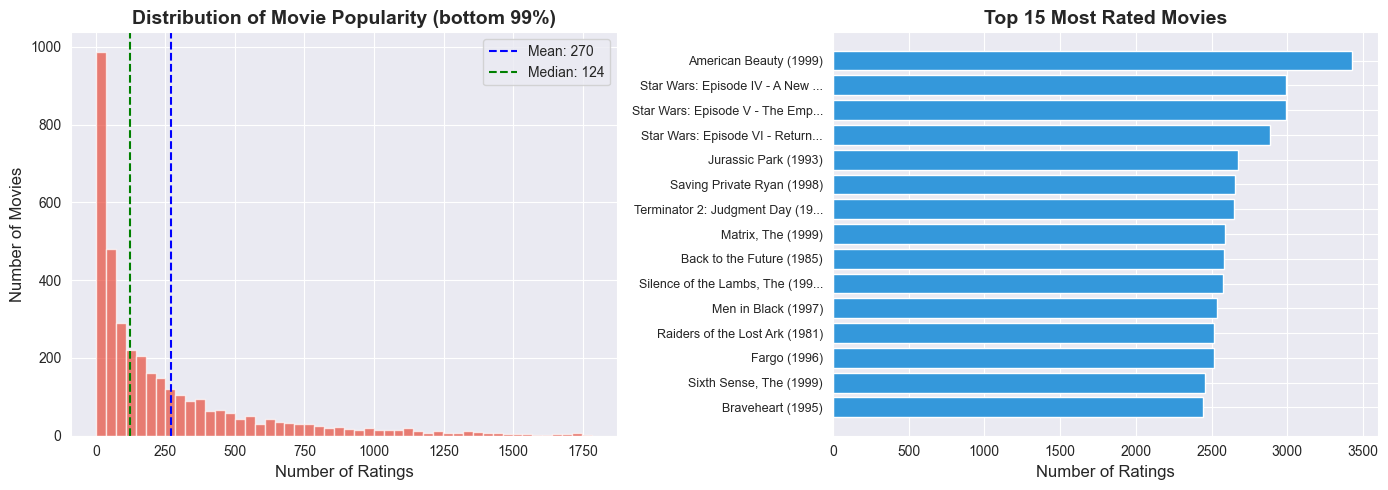

In [39]:
movie_popularity_bottom_99 = movie_popularity[movie_popularity['n_ratings'] <= movie_popularity['n_ratings'].quantile(0.99)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.hist(movie_popularity_bottom_99['n_ratings'], bins=50, edgecolor='white', alpha=0.7, color='#e74c3c')
ax1.axvline(movie_popularity['n_ratings'].mean(), color='blue', linestyle='--',
            label=f'Mean: {movie_popularity["n_ratings"].mean():.0f}')
ax1.axvline(movie_popularity['n_ratings'].median(), color='green', linestyle='--',
            label=f'Median: {movie_popularity["n_ratings"].median():.0f}')
ax1.set_xlabel('Number of Ratings', fontsize=12)
ax1.set_ylabel('Number of Movies', fontsize=12)
ax1.set_title('Distribution of Movie Popularity (bottom 99%)', fontsize=14, fontweight='bold')
ax1.legend()

ax2 = axes[1]
top_movies = movie_popularity.nlargest(15, 'n_ratings')
bars = ax2.barh(range(len(top_movies)), top_movies['n_ratings'], color='#3498db')
ax2.set_yticks(range(len(top_movies)))
ax2.set_yticklabels([t[:30] + '...' if len(t) > 30 else t for t in top_movies['Title']], fontsize=9)
ax2.set_xlabel('Number of Ratings', fontsize=12)
ax2.set_title('Top 15 Most Rated Movies', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('./plots/movie_popularity.png', bbox_inches='tight')
plt.show()

---
## 5. Temporal Dynamics

Analyzing how interaction patterns change over time.

### Temp Features

In [40]:
ratings_temporal = ratings.copy()
ratings_temporal['date'] = ratings_temporal['Timestamp'].dt.date
ratings_temporal['year_month'] = ratings_temporal['Timestamp'].dt.to_period('M')
ratings_temporal['day_of_week'] = ratings_temporal['Timestamp'].dt.day_name()
ratings_temporal['hour'] = ratings_temporal['Timestamp'].dt.hour
ratings_temporal['year'] = ratings_temporal['Timestamp'].dt.year
ratings_temporal['month'] = ratings_temporal['Timestamp'].dt.month
print(f"First Rating: {ratings['Timestamp'].min()}")
print(f"Last Rating:  {ratings['Timestamp'].max()}")
print(f"Time Span:    {(ratings['Timestamp'].max() - ratings['Timestamp'].min()).days} days")

First Rating: 2000-04-25 23:05:32
Last Rating:  2003-02-28 17:49:50
Time Span:    1038 days


### Temp Patterns

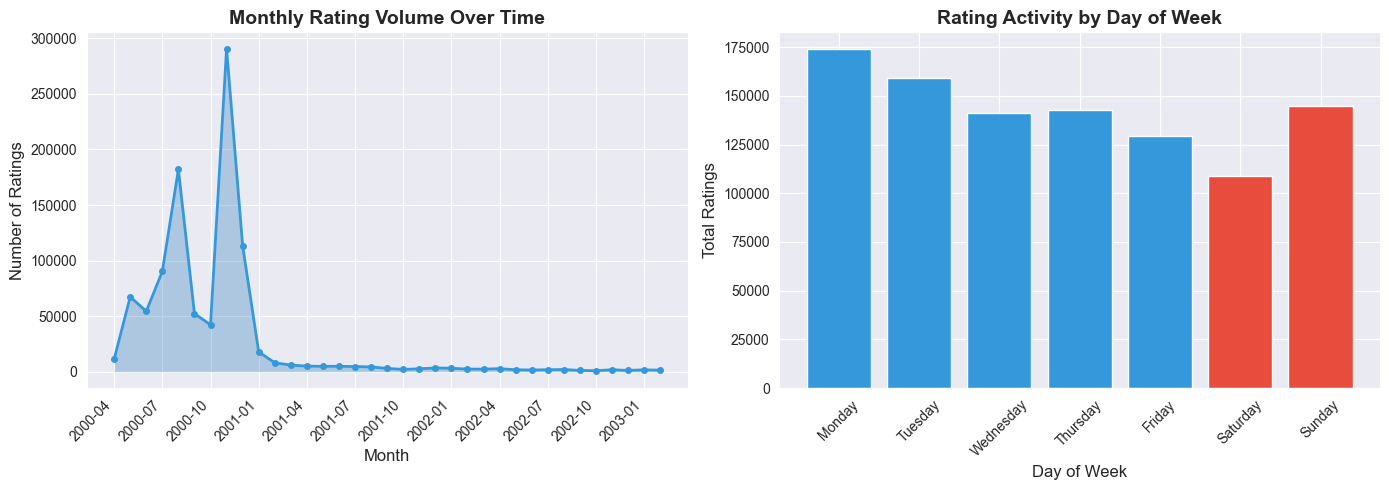

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
monthly_counts = ratings_temporal.groupby('year_month').size()
ax1.plot(range(len(monthly_counts)), monthly_counts.values, marker='o', linewidth=2, 
         markersize=4, color='#3498db')
ax1.fill_between(range(len(monthly_counts)), monthly_counts.values, alpha=0.3)
ax1.set_xticks(range(0, len(monthly_counts), 3))
ax1.set_xticklabels([str(monthly_counts.index[i]) for i in range(0, len(monthly_counts), 3)], 
                    rotation=45, ha='right')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Ratings', fontsize=12)
ax1.set_title('Monthly Rating Volume Over Time', fontsize=14, fontweight='bold')

ax2 = axes[1]
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = ratings_temporal['day_of_week'].value_counts().reindex(dow_order)
colors = ['#3498db'] * 5 + ['#e74c3c'] * 2  # Different color for weekends
ax2.bar(dow_order, dow_counts.values, color=colors, edgecolor='white')
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.set_ylabel('Total Ratings', fontsize=12)
ax2.set_title('Rating Activity by Day of Week', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./plots/temporal_dynamics.png', bbox_inches='tight')
plt.show()

### Temp Activity

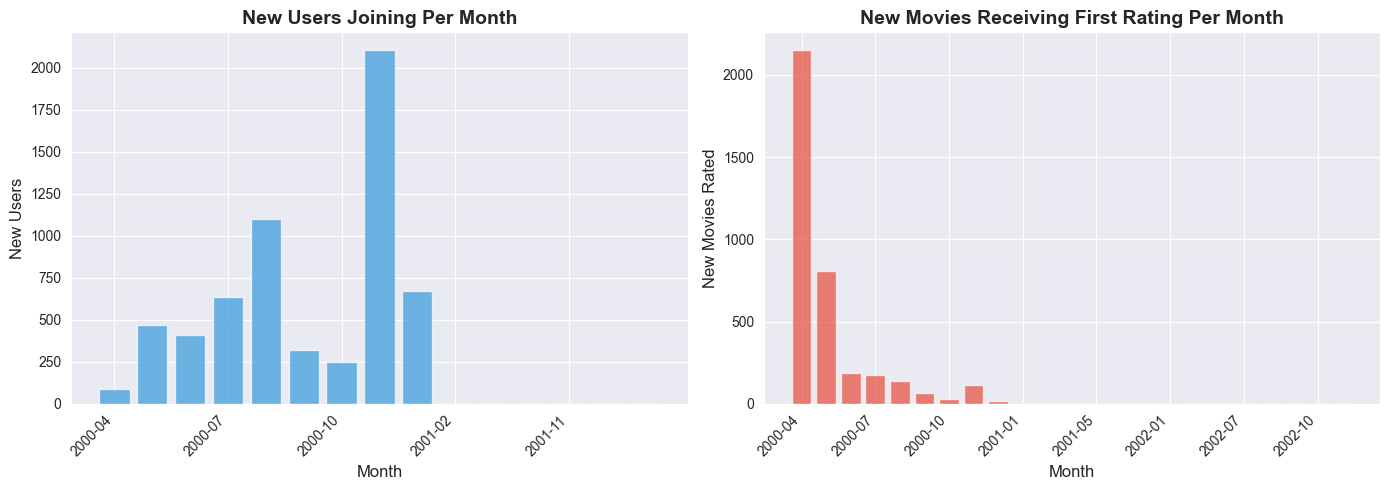

In [42]:
first_rating_user = ratings.groupby('UserID')['Timestamp'].min().reset_index()
first_rating_user['year_month'] = first_rating_user['Timestamp'].dt.to_period('M')
new_users_monthly = first_rating_user.groupby('year_month').size()

first_rating_movie = ratings.groupby('MovieID')['Timestamp'].min().reset_index()
first_rating_movie['year_month'] = first_rating_movie['Timestamp'].dt.to_period('M')
new_movies_monthly = first_rating_movie.groupby('year_month').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
ax1.bar(range(len(new_users_monthly)), new_users_monthly.values, color='#3498db', alpha=0.7)
ax1.set_xticks(range(0, len(new_users_monthly), 3))
ax1.set_xticklabels([str(new_users_monthly.index[i]) for i in range(0, len(new_users_monthly), 3)],
                    rotation=45, ha='right')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('New Users', fontsize=12)
ax1.set_title('New Users Joining Per Month', fontsize=14, fontweight='bold')

ax2 = axes[1]
ax2.bar(range(len(new_movies_monthly)), new_movies_monthly.values, color='#e74c3c', alpha=0.7)
ax2.set_xticks(range(0, len(new_movies_monthly), 3))
ax2.set_xticklabels([str(new_movies_monthly.index[i]) for i in range(0, len(new_movies_monthly), 3)],
                    rotation=45, ha='right')
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('New Movies Rated', fontsize=12)
ax2.set_title('New Movies Receiving First Rating Per Month', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./plots/temporal_new_entities.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Data Pathologies

### Popularity Skew (Long-Tail Problem)

A small number of popular items receive most of the ratings, while the "long tail" of niche items has very few interactions.

Top 1% of movies account for                        8.9% of ratings
Top 10% of movies account for                      44.5% of ratings
Top 20% of movies account for                      65.2% of ratings
Gini Coefficient (inequality)                      0.634 - HIGH INEQUALITY


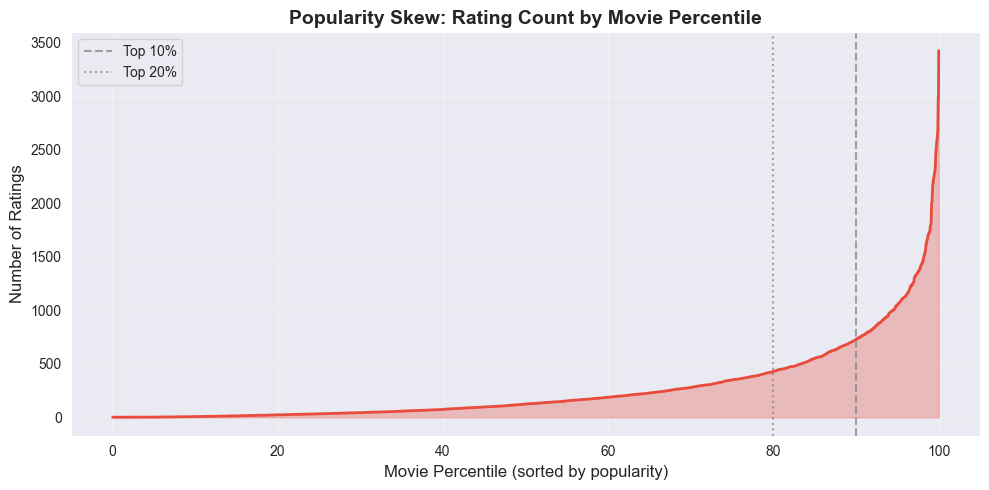

In [43]:
sorted_movie_pop = movie_popularity.sort_values('n_ratings', ascending=True)  # Changed to ascending
sorted_movie_pop['cumulative_ratings'] = sorted_movie_pop['n_ratings'].cumsum()
sorted_movie_pop['pct_cumulative'] = sorted_movie_pop['cumulative_ratings'] / n_ratings * 100
sorted_movie_pop['movie_rank_pct'] = (np.arange(1, len(sorted_movie_pop) + 1) / len(sorted_movie_pop) * 100)

top_20_pct_movies = sorted_movie_pop[sorted_movie_pop['movie_rank_pct'] >= 80]  # Changed to >= 80
top_20_pct_ratings = top_20_pct_movies['n_ratings'].sum() / n_ratings * 100

top_10_pct_movies = sorted_movie_pop[sorted_movie_pop['movie_rank_pct'] >= 90]  # Changed to >= 90
top_10_pct_ratings = top_10_pct_movies['n_ratings'].sum() / n_ratings * 100

top_1_pct_movies = sorted_movie_pop[sorted_movie_pop['movie_rank_pct'] >= 99]  # Changed to >= 99
top_1_pct_ratings = top_1_pct_movies['n_ratings'].sum() / n_ratings * 100

print(f"{'Top 1% of movies account for':<40} {top_1_pct_ratings:>14.1f}% of ratings")
print(f"{'Top 10% of movies account for':<40} {top_10_pct_ratings:>14.1f}% of ratings")
print(f"{'Top 20% of movies account for':<40} {top_20_pct_ratings:>14.1f}% of ratings")

# Gini coefficient calculation
def gini_coefficient(x):
    x = np.array(x, dtype=float)
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))

gini = gini_coefficient(movie_popularity['n_ratings'])
print(f"{'Gini Coefficient (inequality)':<40} {gini:>15.3f} - HIGH INEQUALITY")

# Popularity skew curve
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sorted_movie_pop['movie_rank_pct'], sorted_movie_pop['n_ratings'], 
        linewidth=2, color='#e74c3c')
ax.fill_between(sorted_movie_pop['movie_rank_pct'], sorted_movie_pop['n_ratings'], 
                alpha=0.3, color='#e74c3c')

ax.axvline(90, color='gray', linestyle='--', alpha=0.7, label='Top 10%')
ax.axvline(80, color='gray', linestyle=':', alpha=0.7, label='Top 20%')

ax.set_xlabel('Movie Percentile (sorted by popularity)', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
ax.set_title('Popularity Skew: Rating Count by Movie Percentile', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plots/popularity_skew.png', bbox_inches='tight')
plt.show()

### 6.2 Cold-Start Problem

New users and items with few interactions are difficult to provide recommendations for.

In [44]:
COLD_USER_THRESHOLD = 30   # Users with fewer than 10 ratings
COLD_ITEM_THRESHOLD = 10   # Items with fewer than 20 ratings

cold_users = user_activity[user_activity['n_ratings'] < COLD_USER_THRESHOLD]
cold_items = movie_popularity[movie_popularity['n_ratings'] < COLD_ITEM_THRESHOLD]

# Calculate severe cold-start (< 5 interactions)
severe_cold_users = user_activity[user_activity['n_ratings'] < 23]
severe_cold_items = movie_popularity[movie_popularity['n_ratings'] < 5]

print(f"\n{'--- USER COLD-START ---':^55}")
print(f"{'Metric':<40} {'Value':>15}")
print("-" * 55)
print(f"{'Cold users (< 30 ratings)':<40} {len(cold_users):>15,}")
print(f"{'% of total users':<40} {len(cold_users)/len(user_activity)*100:>14.1f}%")
print(f"{'Severe cold users (< 23 ratings)':<40} {len(severe_cold_users):>15,}")
print(f"{'% of total users':<40} {len(severe_cold_users)/len(user_activity)*100:>14.1f}%")

print(f"\n{'--- ITEM COLD-START ---':^55}")
print(f"{'Metric':<40} {'Value':>15}")
print("-" * 55)
print(f"{'Cold items (< 10 ratings)':<40} {len(cold_items):>15,}")
print(f"{'% of total items':<40} {len(cold_items)/len(movie_popularity)*100:>14.1f}%")
print(f"{'Severe cold items (< 5 ratings)':<40} {len(severe_cold_items):>15,}")
print(f"{'% of total items':<40} {len(severe_cold_items)/len(movie_popularity)*100:>14.1f}%")


                --- USER COLD-START ---                
Metric                                             Value
-------------------------------------------------------
Cold users (< 30 ratings)                            751
% of total users                                   12.4%
Severe cold users (< 23 ratings)                     254
% of total users                                    4.2%

                --- ITEM COLD-START ---                
Metric                                             Value
-------------------------------------------------------
Cold items (< 10 ratings)                            446
% of total items                                   12.0%
Severe cold items (< 5 ratings)                      290
% of total items                                    7.8%


### 6.3 Additional Pathology: Rating Bias

Ratings might be distributed non-normally (i.e. users prefer setting higher scores)

In [45]:
rating_dist = ratings['Rating'].value_counts().sort_index()

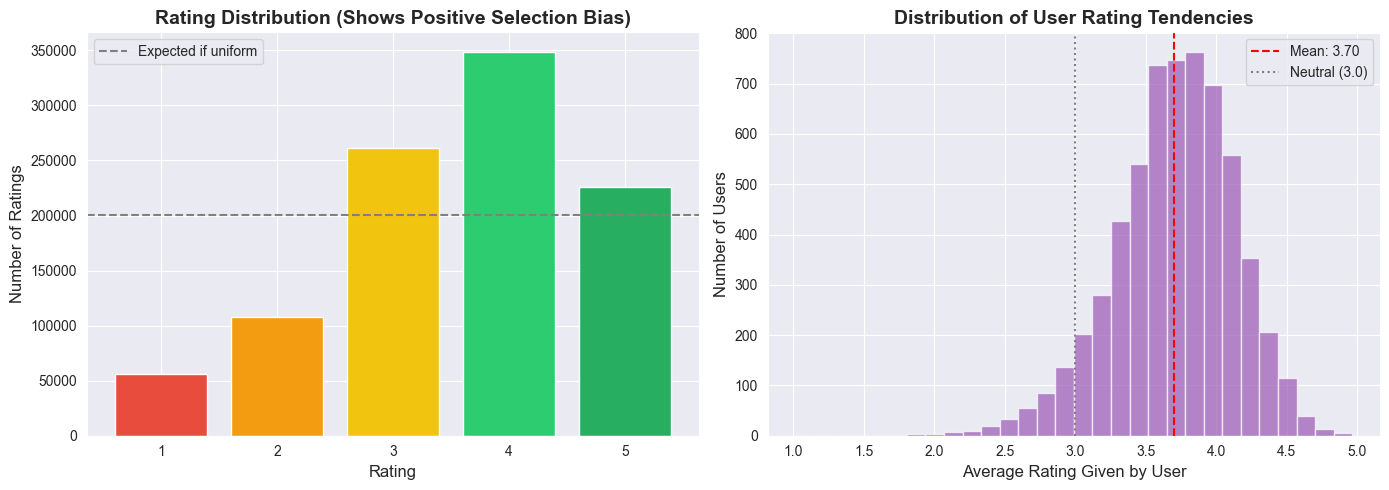

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rating distribution
ax1 = axes[0]
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60']
bars = ax1.bar(rating_dist.index, rating_dist.values, color=colors, edgecolor='white')
ax1.axhline(n_ratings/5, color='gray', linestyle='--', label='Expected if uniform')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Number of Ratings', fontsize=12)
ax1.set_title('Rating Distribution (Shows Positive Selection Bias)', fontsize=14, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.legend()

# Mean rating per user distribution
ax2 = axes[1]
user_mean_rating = ratings.groupby('UserID')['Rating'].mean()
ax2.hist(user_mean_rating, bins=30, edgecolor='white', alpha=0.7, color='#9b59b6')
ax2.axvline(user_mean_rating.mean(), color='red', linestyle='--',
            label=f'Mean: {user_mean_rating.mean():.2f}')
ax2.axvline(3.0, color='gray', linestyle=':', label='Neutral (3.0)')
ax2.set_xlabel('Average Rating Given by User', fontsize=12)
ax2.set_ylabel('Number of Users', fontsize=12)
ax2.set_title('Distribution of User Rating Tendencies', fontsize=14, fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.savefig('./plots/rating_bias.png', dpi=150, bbox_inches='tight')
plt.show()

The distribution of ratings is obviously non-normal, and skewed towards higher scores. 

---
## 7. Summary

In [47]:
print("DATASET STATISTICS")
print("-" * 40)
print(f"  • {n_users:,} users, {n_movies:,} movies, {n_ratings:,} ratings")
print(f"  • Sparsity: {sparsity:.2%} (density: {density:.4%})")
print(f"  • Avg ratings per user: {n_ratings/n_users:.1f}")
print(f"  • Avg ratings per movie: {n_ratings/n_movies:.1f}")

print("DATA PATHOLOGIES")
print("-" * 40)
print(f"  1. POPULARITY SKEW (Gini = {gini:.3f})")
print(f"     - Top 20% of movies: {top_20_pct_ratings:.1f}% of ratings")
print(f"     - Long-tail movies struggle for visibility")

print(f"\n  2. COLD-START PROBLEM")
print(f"     - {len(cold_users):,} users ({len(cold_users)/len(user_activity)*100:.1f}%) have < {COLD_USER_THRESHOLD} ratings")
print(f"     - {len(cold_items):,} movies ({len(cold_items)/len(movie_popularity)*100:.1f}%) have < {COLD_ITEM_THRESHOLD} ratings")

print(f"\n  3. RATING BIAS (Selection Bias)")
print(f"     - Mean rating: {ratings['Rating'].mean():.2f} (skewed positive)")
print(f"     - Users self-select movies they expect to like")

DATASET STATISTICS
----------------------------------------
  • 6,040 users, 3,883 movies, 1,000,209 ratings
  • Sparsity: 95.74% (density: 4.2647%)
  • Avg ratings per user: 165.6
  • Avg ratings per movie: 257.6
DATA PATHOLOGIES
----------------------------------------
  1. POPULARITY SKEW (Gini = 0.634)
     - Top 20% of movies: 65.2% of ratings
     - Long-tail movies struggle for visibility

  2. COLD-START PROBLEM
     - 751 users (12.4%) have < 30 ratings
     - 446 movies (12.0%) have < 10 ratings

  3. RATING BIAS (Selection Bias)
     - Mean rating: 3.58 (skewed positive)
     - Users self-select movies they expect to like


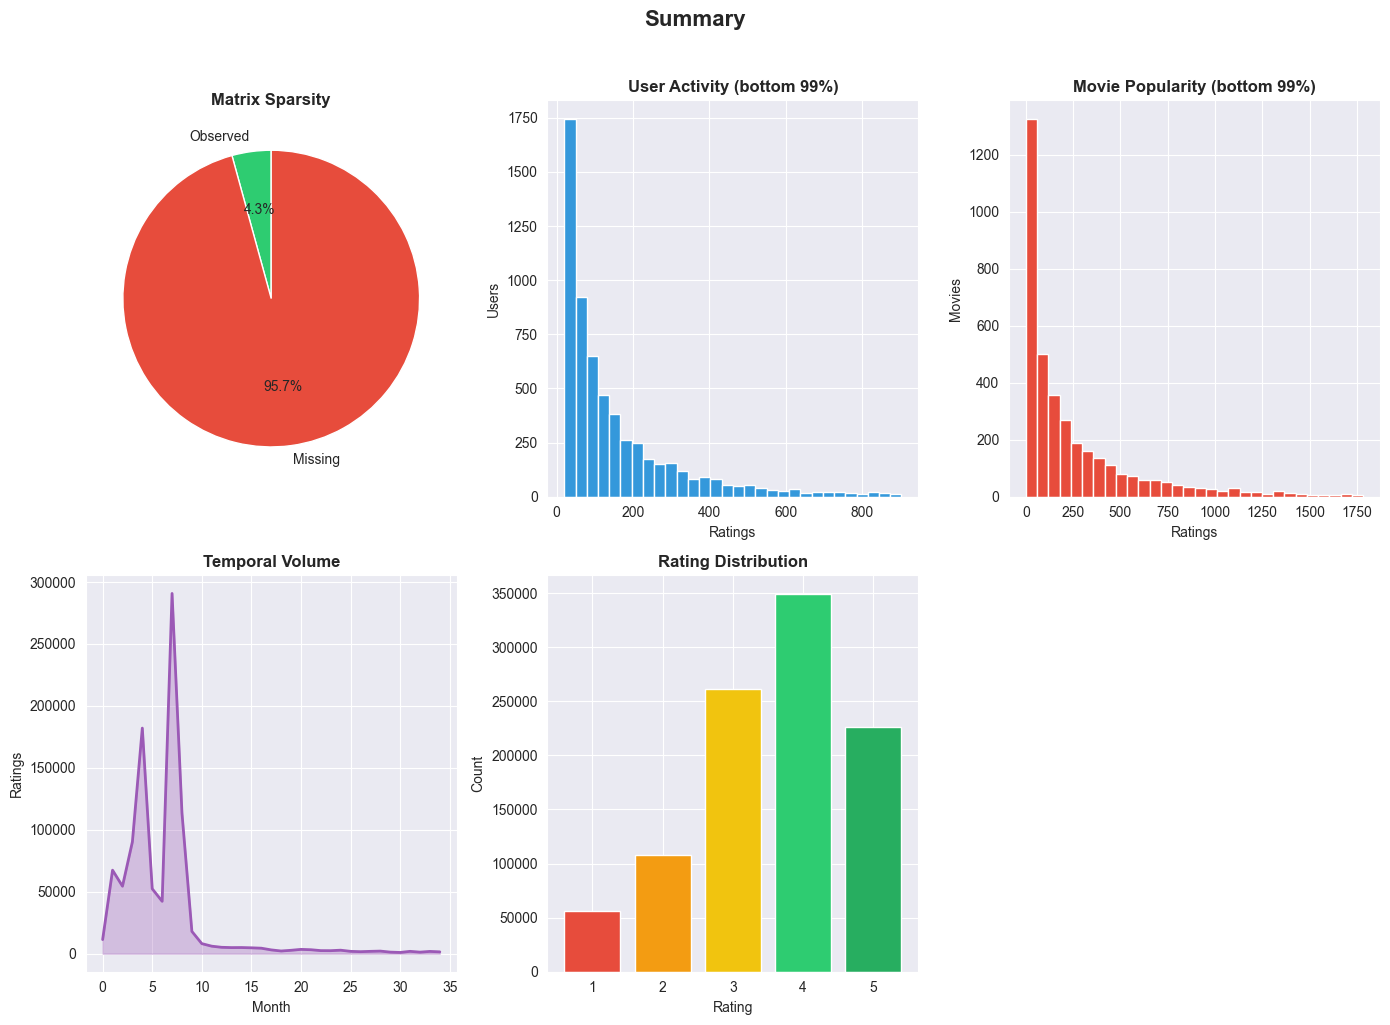

In [48]:
# Create summary visualization
fig = plt.figure(figsize=(14, 10))

# Sparsity
ax1 = fig.add_subplot(2, 3, 1)
ax1.pie([density*100, sparsity*100], labels=['Observed', 'Missing'], 
        colors=['#2ecc71', '#e74c3c'], autopct='%.1f%%', startangle=90)
ax1.set_title('Matrix Sparsity', fontsize=12, fontweight='bold')

# User activity (bottom 99%)
ax2 = fig.add_subplot(2, 3, 2)
user_99 = user_activity[user_activity['n_ratings'] <= user_activity['n_ratings'].quantile(0.99)]
ax2.hist(user_99['n_ratings'], bins=30, color='#3498db', edgecolor='white')
ax2.set_xlabel('Ratings')
ax2.set_ylabel('Users')
ax2.set_title('User Activity (bottom 99%)', fontsize=12, fontweight='bold')

# Movie popularity (bottom 99%)
ax3 = fig.add_subplot(2, 3, 3)
movie_99 = movie_popularity[movie_popularity['n_ratings'] <= movie_popularity['n_ratings'].quantile(0.99)]
ax3.hist(movie_99['n_ratings'], bins=30, color='#e74c3c', edgecolor='white')
ax3.set_xlabel('Ratings')
ax3.set_ylabel('Movies')
ax3.set_title('Movie Popularity (bottom 99%)', fontsize=12, fontweight='bold')

# Temporal trend
ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(range(len(monthly_counts)), monthly_counts.values, color='#9b59b6', linewidth=2)
ax4.fill_between(range(len(monthly_counts)), monthly_counts.values, alpha=0.3, color='#9b59b6')
ax4.set_xlabel('Month')
ax4.set_ylabel('Ratings')
ax4.set_title('Temporal Volume', fontsize=12, fontweight='bold')

# Rating distribution
ax5 = fig.add_subplot(2, 3, 5)
ax5.bar([1, 2, 3, 4, 5], rating_dist.values, color=['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60'])
ax5.set_xlabel('Rating')
ax5.set_ylabel('Count')
ax5.set_title('Rating Distribution', fontsize=12, fontweight='bold')

plt.suptitle('Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('./plots/eda_summary.png', bbox_inches='tight')
plt.show()